In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import mplfinance as mpf
#import matplotlib.dates as mdates
import numpy as np

# Read in daily data for NSE TCS

In [3]:
infile = 'data/t_data.csv'
df = pd.read_csv(infile, index_col=0, parse_dates=True,dayfirst=True)

In [4]:
df.columns

Index(['Id', 'Open', 'High', 'Low', 'Close', 'Volume', 'SUPERT_7_3.0',
       'SUPERTd_7_3.0', 'SUPERTl_7_3.0', 'SUPERTs_7_3.0', 'm_low', 'm_high',
       'm_close', 'm_open', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0',
       'BBB_20_2.0', 'BBP_20_2.0', 'MACD_12_26_9', 'MACDh_12_26_9',
       'MACDs_12_26_9', 'TwoDayHigh', 'TwoDayLow', 'FiveDayHigh', 'FiveDayLow',
       'SMA100', 'SMA50', 'SMA21', 'SMA14', 'SMA7', 'AVVol', 'RSI', 'P', 'S1',
       'S2', 'S3', 'R1', 'R2', 'R3', 'm_P', 'm_S1', 'm_S2', 'm_S3', 'm_R1',
       'm_R2', 'm_R3', 'C_m_R1', 'C_m_R2', 'C_m_S1', 'C_m_S2', 'Tenkan-sen',
       'Kijun-sen', 'Senkou_Span_A', 'Senkou_Span_B', 'Chikou_Span',
       'BB_UL_Per', 'Support', 'Resistance', 'DCL_10_15', 'DCM_10_15',
       'DCU_10_15'],
      dtype='object')

In [5]:
#tdf = df[['Id', 'Open', 'High', 'Low', 'Close', 'Volume', 'SUPERT_7_3.0','SUPERTd_7_3.0', 'SUPERTl_7_3.0', 'SUPERTs_7_3.0',]]
tdf = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
tdf.head()
tdf.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-07,3450.00,3548.00,3431.55,3484.90,3054130
2022-03-08,3460.00,3609.00,3460.00,3599.95,3300990
2022-03-09,3605.00,3654.00,3597.05,3632.60,2719650
2022-03-10,3684.00,3684.00,3615.00,3620.95,2005440
2022-03-11,3603.25,3639.85,3592.85,3599.15,1623420


,Open,High,Low,Close,Volume
Date,,,,,
2023-04-06,3225.00,3257.35,3215.00,3220.70,1703460
2023-04-10,3220.00,3272.00,3215.00,3263.40,2203180
2023-04-11,3264.00,3272.95,3192.15,3213.80,2348780
2023-04-12,3227.95,3260.95,3199.00,3241.65,2417610
2023-04-13,3210.00,3230.00,3180.00,3188.85,4173910


In [6]:
tdf['hl'] = abs(tdf.High-tdf.Low)
tdf['hpc'] = abs(tdf.High - tdf.Close.shift(1))
tdf['lpc'] = abs(tdf.Low - tdf.Close.shift(1))

tdf['tr'] = tdf[['hl','hpc','lpc']].max(axis=1)

tdf['atr7'] = tdf.tr.rolling(7).mean()

tdf['mp'] = (tdf.High + tdf.Low)/2.0

tdf['ub'] = tdf.mp + (3.0*tdf.atr7)
tdf['lb'] = tdf.mp - (3.0*tdf.atr7)

tdf.head(30)


,Open,High,Low,Close,Volume,hl,hpc,lpc,tr,atr7,mp,ub,lb
Date,,,,,,,,,,,,,
2022-03-07,3450.00,3548.00,3431.55,3484.90,3054130,116.45,NaN,NaN,116.45,NaN,3489.775,NaN,NaN
2022-03-08,3460.00,3609.00,3460.00,3599.95,3300990,149.00,124.10,24.90,149.00,NaN,3534.500,NaN,NaN
2022-03-09,3605.00,3654.00,3597.05,3632.60,2719650,56.95,54.05,2.90,56.95,NaN,3625.525,NaN,NaN
2022-03-10,3684.00,3684.00,3615.00,3620.95,2005440,69.00,51.40,17.60,69.00,NaN,3649.500,NaN,NaN
2022-03-11,3603.25,3639.85,3592.85,3599.15,1623420,47.00,18.90,28.10,47.00,NaN,3616.350,NaN,NaN
2022-03-14,3580.00,3648.35,3580.00,3643.00,1765690,68.35,49.20,19.15,68.35,NaN,3614.175,NaN,NaN
2022-03-15,3659.00,3659.00,3585.40,3593.90,3651130,73.60,16.00,57.60,73.60,82.907143,3622.200,3870.921429,3373.478571
2022-03-16,3640.50,3668.00,3616.25,3655.90,3090480,51.75,74.10,22.35,74.10,76.857143,3642.125,3872.696429,3411.553571
2022-03-17,3696.60,3710.00,3660.30,3672.75,3600450,49.70,54.10,4.40,54.10,63.300000,3685.150,3875.050000,3495.250000


In [7]:
def calculate_atr(atr_length, highs, lows, closes):
    """Calculate the average true range
    atr_length : time period to calculate over
    all_highs : list of highs
    all_lows : list of lows
    all_closes : list of closes
    """
    if atr_length < 1:
        raise ValueError("Specified atr_length may not be less than 1")
    elif atr_length >= len(closes):
        raise ValueError("Specified atr_length is larger than the length of the dataset: " + str(len(closes)))
    atr = 0
    for i in range(len(highs)-atr_length, len(highs)):
        high = highs[i]
        low = lows[i]
        close_prev = closes[i-1]
        tr = max(abs(high-low), abs(high-close_prev), abs(low-close_prev))
        atr += tr
        print('atr=',atr)
    return atr/atr_length

In [8]:
atr = calculate_atr(7,df.High,df.Low,df.Close)
433.8/7

atr= 51.19999999999982
atr= 130.04999999999973
atr= 172.39999999999964
atr= 229.39999999999964
atr= 310.19999999999936
atr= 372.1499999999992
atr= 433.7999999999993


61.971428571428575

In [9]:
#Function For Color Coding Supertrend
def color(super_trend):
    UP = []
    DOWN = []
    for i in range(len(super_trend)):
        if super_trend['SUPERTl_7_3.0'][i] < super_trend['Close'][i]:
            UP.append(int(super_trend['SUPERTl_7_3.0'][i]))
            DOWN.append(np.nan)
        elif super_trend['SUPERTl_7_3.0'][i] > super_trend['Close'][i]:
            DOWN.append(int(super_trend['SUPERTs_7_3.0'][i]))
            UP.append(np.nan)
        else:
            UP.append(np.nan)
            DOWN.append(np.nan)
    super_trend['up'] = UP
    super_trend['down'] = DOWN
    return super_trend        

In [10]:
#Fuction Color Applied And Df Generated 
super_trend = color(df)

In [11]:
# Data Extracted And New Variable Applied
up_super_trend = super_trend[['up']]
down_super_trend = super_trend[['down']]

In [12]:
ic = [
    #Supertrend
    mpf.make_addplot(up_super_trend,color = 'green',panel=0,),
    mpf.make_addplot(down_super_trend,color = '#FF8849',panel=0,),
    
]

In [13]:
#Fill Between Method Appled
fill_between_up=dict(y1=super_trend['up'].values,y2=super_trend['Low'].values,alpha=0.05,color='g')
fill_between_down=dict(y1=super_trend['down'].values,y2=super_trend['High'].values,alpha=0.05,color='r')

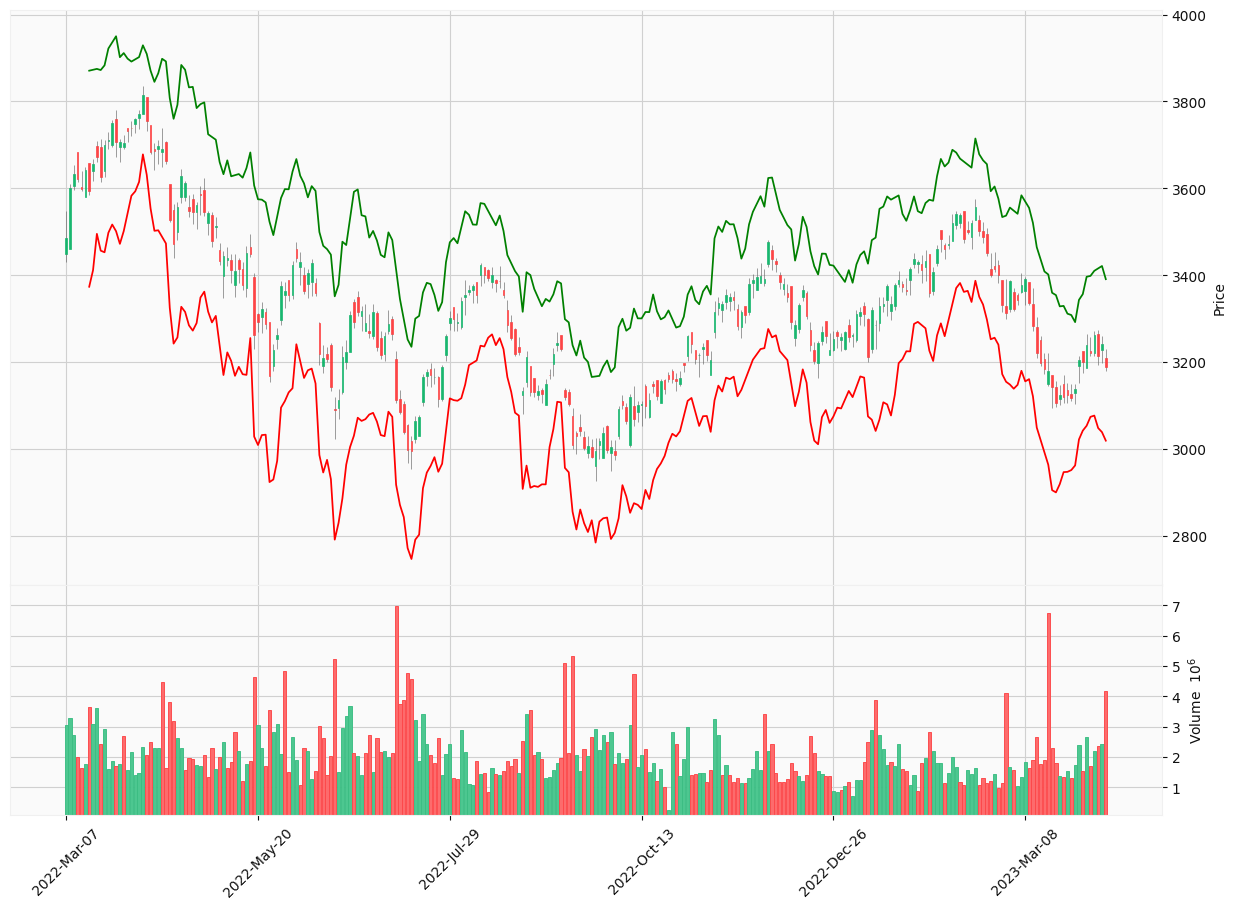

In [14]:
mpf.plot(tdf,volume=True,type='candle',style='yahoo',
         addplot=[mpf.make_addplot(tdf.ub,color='g',panel=0),
                  mpf.make_addplot(tdf.lb,color='r',panel=0),
                 ],
         figscale=2
        )

In [17]:
up_super_trend.head(20)

,up
Date,
2022-03-07,NaN
2022-03-08,NaN
2022-03-09,NaN
2022-03-10,NaN
2022-03-11,NaN
2022-03-14,NaN
2022-03-15,NaN
2022-03-16,NaN
2022-03-17,NaN


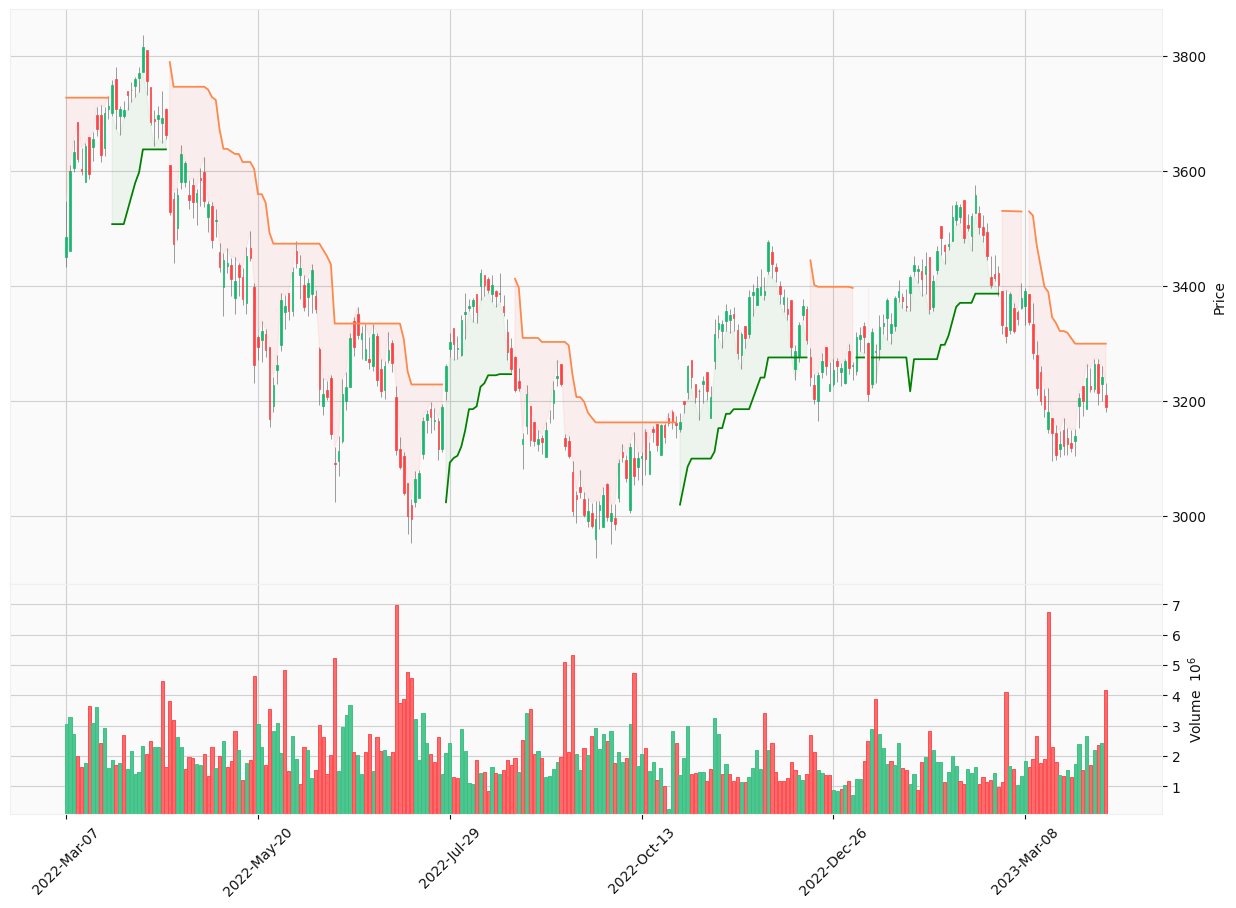

In [15]:
mpf.plot(
    df,
    volume=True,
    type="candle", 
    style="yahoo",
    addplot=ic,
    figscale=2,
    fill_between = [fill_between_up,fill_between_down],
)